In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import math
%matplotlib inline
!conda install sympy --yes


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - sympy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.7.22  |                0         125 KB
    certifi-2020.6.20          |           py36_0         156 KB
    fastcache-1.1.0            |   py36h7b6447c_0          31 KB
    gmpy2-2.0.8                |   py36h10f8cd9_2         150 KB
    mpc-1.1.0                  |       h10f8cd9_1          90 KB
    mpfr-4.0.2                 |       hb69a4c5_1         487 KB
    mpmath-1.1.0               |           py36_0         776 KB
    openssl-1.1.1g             |       h7b6447c_0         2.5 MB
    sympy

# Modelo de Krönig-Penney

## Daniel Souza Lima

## Uso extensivo de SymPy, pacote para cálculo simbólico

In [7]:
import sympy 
from sympy import *
from sympy import Matrix, ImmutableMatrix

k = symbols('k')
k0 = symbols('k_0')
m = symbols('m')
hbar = symbols('hbar')
V = symbols('V')
a = symbols('a')
alpha = symbols('alpha')
E = symbols('E')

In [53]:
n=2    # Número de próximos vizinhos


# Criação da matriz tridiagonal

A = zeros(n,n)
for i in range(0,sqrt(len(A)) ):
    
    A[i,i] = alpha*pow(k-i*k0,2)
    if (i<sqrt(len(A))-1):
        A[i,i+1] = V/2
        
    if i>0:    
        A[i,i-1] = V/2
print('A matriz tridiagonal é:')
A

A matriz tridiagonal é:


Matrix([
[alpha*k**2,                V/2],
[       V/2, alpha*(k - k_0)**2]])

## Geração do polinômio característico (não recomendável para n>3!): 

In [54]:
p = A.charpoly(E)
h = p.as_expr()
h 



E**2 + E*(-2*alpha*k**2 + 2*alpha*k*k_0 - alpha*k_0**2) - V**2/4 + alpha**2*k**4 - 2*alpha**2*k**3*k_0 + alpha**2*k**2*k_0**2

## Usando o método de se achar autovalores: 

In [89]:
bandas = A.eigenvals() # criação de um DICIONÁRIO cujas chaves são os próprios autovalores e a degenerecências, os valores. 
banda = list(bandas.keys()) # Criei uma lista com as raízes
banda[0].subs(k,-k0/2)


5*alpha*k_0**2/4 - sqrt(V**2 + 4*alpha**2*k_0**4)/2

In [88]:
from sympy.plotting import plot

hplanck = 6.62607004*pow(10,-34) # Constante de Planck
m = 9.10938356*pow(10,-31) # massa do elétron
a = 1 # parâmetro da distância reticular a em ängstrom  
a = a*pow(10,-10)
V_pot = 1 # O potencial dado em unidades de eV

V_pot = V_pot*1.602176634*pow(10,-19) 

# Vetor da rede recíproca
replace = [(k0,2*math.pi/a),(alpha ,((hplanck)**2)/(2*m)),(V,V_pot*1.602176634*pow(10,-19)),(k,k*pow(10,10))]
replace2 = [(k0,1),(alpha,1),(V,1)]
p = banda[1].subs(replace2)#/(1.602176634*pow(10,-19))
q = banda[0].subs(replace2)#/(1.602176634*pow(10,-19))
p


TypeError: 'int' object is not subscriptable

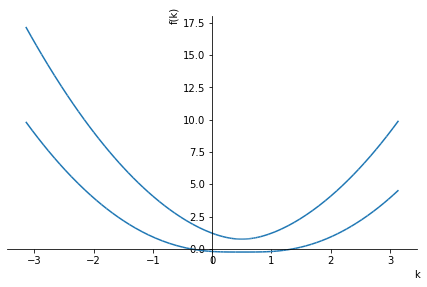

In [79]:
aux3 = plot(p,(k,-math.pi,math.pi),show=False)
aux2 = plot(q,(k,-math.pi,math.pi),show=False)
aux1.append(aux2[0])

aux3.extend(aux2)
aux3.show()
from sympy.abc import x 

#f = lambdify(k,p)
#print(f(1/2),' ',f(-1/2))
